This code imports all the necessary libraries for the project.

In [12]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth
import os
from dotenv import load_dotenv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import NearestNeighbors
import numpy as np

print("Libraries Imported")

Libraries Imported


This code uses the Spotify Dashboard Information to have access to the user's API

In [14]:
client_id = "cef41020053f4c68b7c51c80d78e5c31"
client_secret = "a727a865b58447f9a6d5db1588fb57b9"
redirect_uri = "http://127.0.0.1:8888/callback"

load_dotenv()

sp = spotipy.Spotify(auth_manager=SpotifyOAuth(
    client_id=os.getenv("SPOTIPY_CLIENT_ID"),
    client_secret=os.getenv("SPOTIPY_CLIENT_SECRET"),
    redirect_uri=os.getenv("SPOTIPY_REDIRECT_URI"),
    scope="user-library-read playlist-modify-public user-read-recently-played user-top-read"
))

print("API Found")

API Found


This section makes a visual that finds the Top 5 Artists and the minutes listened to from the past 50 tracks due to Spotify's API limits.

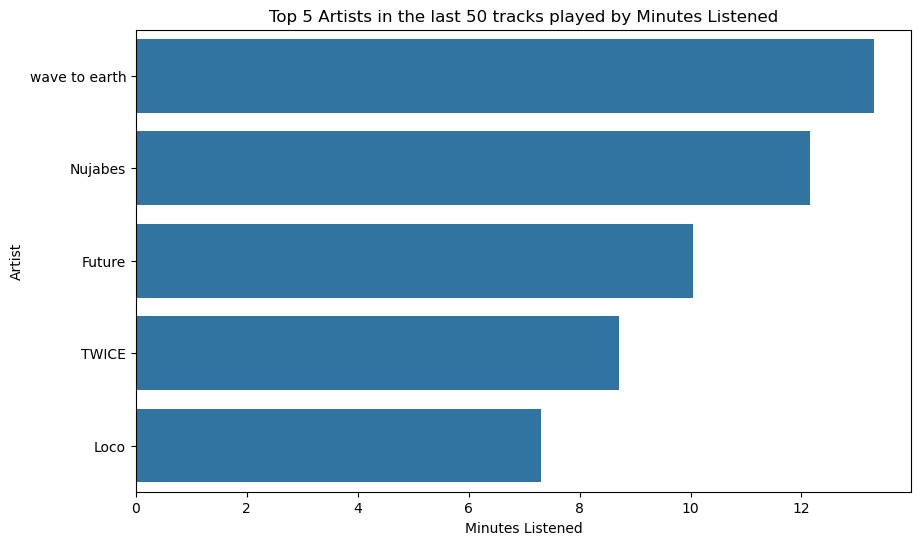

In [3]:
recent_tracks = sp.current_user_recently_played(limit=50)
artist_minutes = {}

for item in recent_tracks['items']:
    track = item['track']
    artist_name = track['artists'][0]['name']
    duration_min = track['duration_ms'] / 1000 / 60

    if artist_name in artist_minutes:
        artist_minutes[artist_name] += duration_min
    else:
        artist_minutes[artist_name] = duration_min


df_artists = pd.DataFrame(list(artist_minutes.items()), columns=['Artist', 'Minutes'])
df_artists = df_artists.sort_values(by='Minutes', ascending=False).head(5)

plt.figure(figsize=(10,6))
sns.barplot(x='Minutes', y='Artist', data=df_artists)
plt.xlabel('Minutes Listened')
plt.ylabel('Artist')
plt.title('Top 5 Artists in the last 50 tracks played by Minutes Listened')
plt.show()


This section makes a visual that finds the Top 5 Tracks and the minutes listened to from the past 50 tracks due to Spotify's API limits.

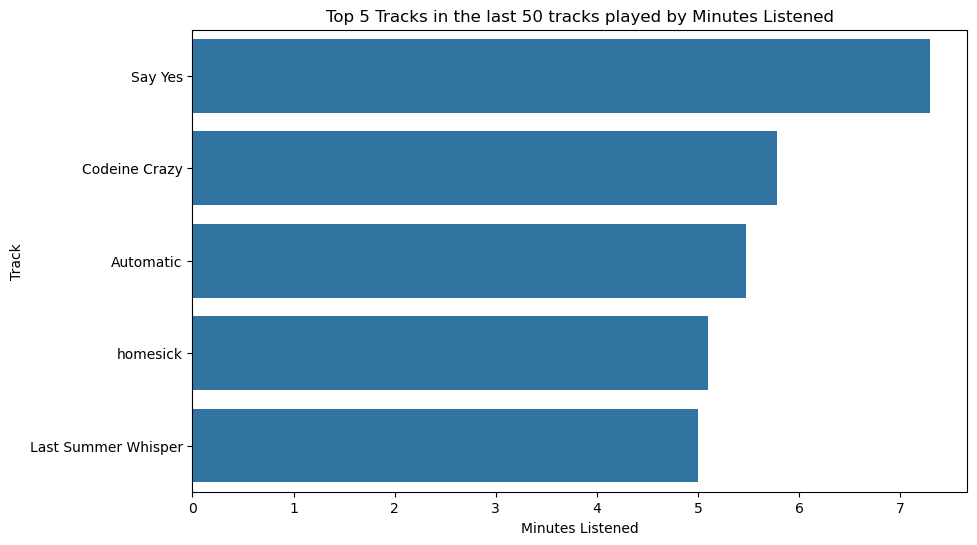

In [4]:
track_minutes = {}
for item in recent_tracks['items']:
    track = item['track']
    track_name = track['name']
    duration_min = track['duration_ms'] / 1000 / 60  

    if track_name in track_minutes:
        track_minutes[track_name] += duration_min
    else:
        track_minutes[track_name] = duration_min

df_tracks = pd.DataFrame(list(track_minutes.items()), columns=['Track', 'Minutes'])
df_tracks = df_tracks.sort_values(by='Minutes', ascending=False).head(5)

plt.figure(figsize=(10,6))
sns.barplot(x='Minutes', y='Track', data=df_tracks)
plt.xlabel('Minutes Listened')
plt.ylabel('Track')
plt.title('Top 5 Tracks in the last 50 tracks played by Minutes Listened')
plt.show()

This section makes a visual that finds the Top 5 Tracks of all time from the User's History and sorts it by its popularity score.

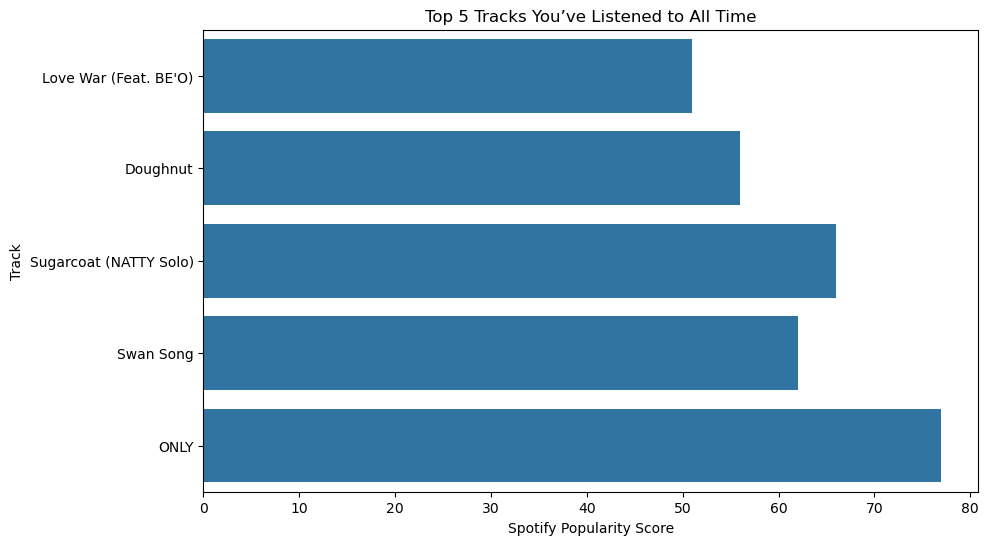

In [5]:
# Top 5 Tracks of All Time
top_tracks_data = sp.current_user_top_tracks(limit=5, time_range='long_term')

tracks = []
artists = []
popularity_scores = []

for track in top_tracks_data['items']:
    tracks.append(track['name'])
    artists.append(track['artists'][0]['name'])
    popularity_scores.append(track['popularity'])


df_tracks_all_time = pd.DataFrame({
    'Track': tracks,
    'Artist': artists,
    'Popularity': popularity_scores
})


plt.figure(figsize=(10,6))
sns.barplot(x='Popularity', y='Track', data=df_tracks_all_time)
plt.xlabel('Spotify Popularity Score')
plt.ylabel('Track')
plt.title('Top 5 Tracks You’ve Listened to All Time')
plt.show()